# In this Notebook following steps were followed - 


1. Tokenised Text - Text was tokeinsed
2. Stemmed Text - Tokenised text was stemmed 
3. Stopwords Deleted - stopwords were removed from Stemmed Text
4. Vectorized Form - After all preprocessing, text was finally transformed into vectorized form
5. Oversampled Data - Data was oversampled with help of ADASYN
6. Train-Test Split - Oversampled data was split in 70-30 ratio
7. After this model was trained with (X_train, y_train) and tested on (X_test,y_test) 
8. Model and vectorizer were saved on disk in form of .pkl file



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd '/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/'

In [ ]:
# Importing necessary paackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
# from nltk.stem.porter import PorterStemmer
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.stem.wordnet import WordNetLemmatizer
import string

from imblearn.over_sampling import ADASYN

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer 
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
seed = 42

from sklearn.externals import joblib

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/Musical_instruments_reviews.csv')   # Load Data
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
# Function for cleaning dataset

class Sentiment:
    POSITIVE = "POSITIVE"
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"

#Creating Columns for the year, month and day
def get_year(reviewTime):
    return reviewTime.split(",")[1].strip(" ")

#Function to create 
def get_day(reviewTime):
    return reviewTime.split(" ")[1].strip(",")

#Sentiment Score     (Categorising Opinions Task-1)  
def get_sentiment(score):
    if score <= 2:
        return 'NEGATIVE'
    elif score == 3:
        return 'NEUTRAL'
    else: 
        return 'POSITIVE'
    
def text_clean(text):
    text = str(text).lower()
    text = re.sub(r'@[A-Za-z0-9]','',text)# Removes @mentions
    text = re.sub(r'#','',text)# Removing the Hashtag
    text = re.sub(r'RT[\s]','',text)# Removing RT
    text = re.sub(r'_','',text)# Removing RT
    return text

In [ ]:
# Cleaning The dataset

data['count'] = 1 
data['year'] = data.reviewTime.apply(get_year)
data['month'] =  data['reviewTime'].str[:2]
data['day'] = data.reviewTime.apply(get_day)
data['Sentiment'] = data.overall.apply(get_sentiment)

#Converting Column data type from object to integer
data['year'] = data['year'].astype('int64')
data['month'] = data['month'].astype('int64')
data['day'] = data['day'].astype('int64')

#Cleaning Text
data['reviewText'] = data['reviewText'].apply(text_clean)

In [ ]:
X = data['reviewText']    # Initialising Features
y = data['Sentiment']     # Initialising Target

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')        # Initialising Vectorizer
X = vectorizer.fit_transform(X)                           # Input Data Vectorized

In [ ]:
joblib_file = "/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/vect.pkl"    # Saving Vectorizer on disk
joblib.dump(vectorizer, joblib_file)

['/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/vect.pkl']

In [ ]:
smote = ADASYN(random_state= seed)      # Over-Sampling Data
X_smote, y_smote = smote.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size= 0.3, random_state= seed)     # Train-Test Data Split

In [ ]:
svm = SVC(kernel='rbf')     # Initialising Model

In [ ]:
svm.fit(X_train,y_train)     # Training Model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svmc = svm.predict(X_test)    # Testing Model

## Validation Metrics

### Accuracy, Precision, Recall, F1_Score 

In [ ]:
# accuracy: 
acc = accuracy_score(y_test, svmc)
print('Accuracy: %f' % acc)

# precision: tp / (tp + fp)
precision = precision_score(y_test, svmc,average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, svmc,average='weighted')
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, svmc,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.991934
Precision: 0.992117
Recall: 0.991934
F1 score: 0.991947


### Classification Report

Support Vector Classifier


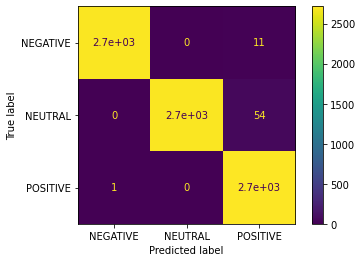


Classification Report
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      2713
     NEUTRAL       1.00      0.98      0.99      2754
    POSITIVE       0.98      1.00      0.99      2716

    accuracy                           0.99      8183
   macro avg       0.99      0.99      0.99      8183
weighted avg       0.99      0.99      0.99      8183

Model Accuracy:  0.9919344983502383


In [ ]:
print('Support Vector Classifier')
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()
print()
print('Classification Report')
print(classification_report(y_test, svmc))
print('Model Accuracy: ',accuracy_score(y_test,svmc))

In [ ]:
#  save the model to disk
joblib_file = "/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/SVMModel.pkl"  
joblib.dump(svm, joblib_file)

['/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/SVMModel.pkl']

### Cross Validation with 5 iter

In [ ]:
score = cross_val_score(svm, X_smote, y_smote, scoring='accuracy')

In [ ]:
print("%f mean accuracy with a standard deviation of %f" % (score.mean(), score.std()))

0.981925 mean accuracy with a standard deviation of 0.032491


## Exploratory Data Analysis

### From graph given below we can conclude that most of product got 5 star rating by people proving the quality of products

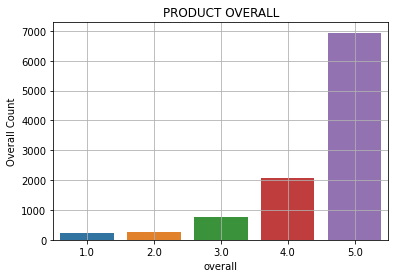

In [ ]:
#Product Valuation
sns.countplot(data=data, x='overall')
plt.ylabel('Overall Count')
plt.title('PRODUCT OVERALL')
plt.grid()
plt.show()

### From graph given below this we can conclude that most rating given by customers are positive and rarely negative or neutral.

Hence we can also conclude that given dataset is unbalanced  

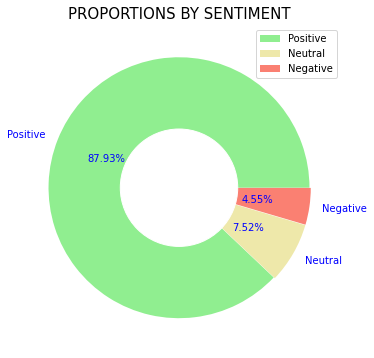

In [ ]:
#Reviews Sentiment
size_complete = data['Sentiment'].value_counts()
colors_complete = ['lightgreen', 'palegoldenrod','salmon']
labels_complete = "Positive", "Neutral","Negative"
explode = [0, 0.01,0.01]

#(0,0) is to create the circle and 0.5 for the width of the circle, white is for the center of the circle
my_circle_complete = plt.Circle((0, 0), 0.45, color = 'white')

plt.figure(figsize=(8,6))
plt.pie(size_complete, colors = colors_complete, labels = labels_complete, shadow = False, explode = explode, autopct = '%.2f%%',textprops=dict(color='blue'))
plt.title('PROPORTIONS BY SENTIMENT', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(my_circle_complete)
plt.legend()
plt.show()

### From the graph given below we can see that which customer has given us good business 

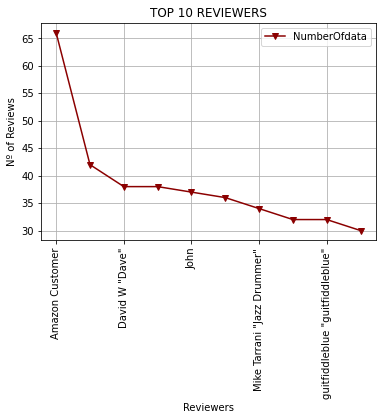

In [ ]:
#Top 10 reviewers
top_ten = data['reviewerName'].value_counts()
top_ten = top_ten.head(10)
top_ten = pd.DataFrame(top_ten)
top_ten.columns = ['NumberOfdata']

top_ten.plot(color='darkred',marker='v',linestyle='-')
plt.xticks(rotation=90)
plt.title('TOP 10 REVIEWERS')
plt.grid()
plt.xlabel('Reviewers')
plt.ylabel('Nº of Reviews')
plt.show()

### From graph given below we can find out about our growth of business yearly

<Figure size 1008x720 with 0 Axes>

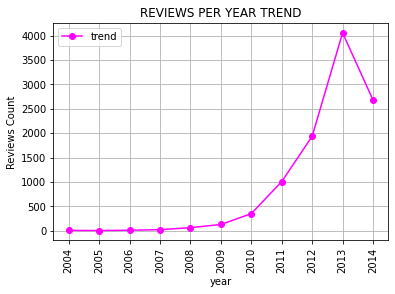

In [ ]:
#Grouping By  year
year_review = data.groupby(by='year').sum()
year_review = year_review.drop(columns=['month','day','overall','unixReviewTime'])
year_review.columns = ['trend']

#Creating index
#Creating index for the plot
year_index = year_review.index.unique()

#Plot
plt.figure(figsize=(14,10))
year_review.plot(color='magenta',linestyle='-',marker='o')
plt.xticks(year_index,rotation=90)
plt.grid()
plt.ylabel('Reviews Count')
plt.title('REVIEWS PER YEAR TREND')
plt.show()

### From graph given below we can find out about our growth of business monthly

<Figure size 1008x720 with 0 Axes>

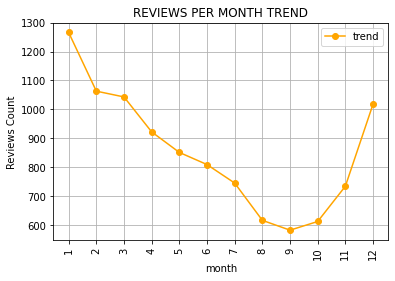

In [ ]:
# Grouping by month
month_review = data.groupby(by='month').sum()
month_review = month_review.drop(columns=['year','day','overall','unixReviewTime'])
month_review.columns = ['trend']

#Creating index for the plot
month_index = month_review.index.unique()

#Creating plot
plt.figure(figsize=(14,10))
month_review.plot(color='orange',linestyle='-',marker='o')
plt.xticks(month_index,rotation=90)
plt.grid()
plt.ylabel('Reviews Count')
plt.title('REVIEWS PER MONTH TREND')
plt.show()

### From graph given below we can find out about our growth of business daily

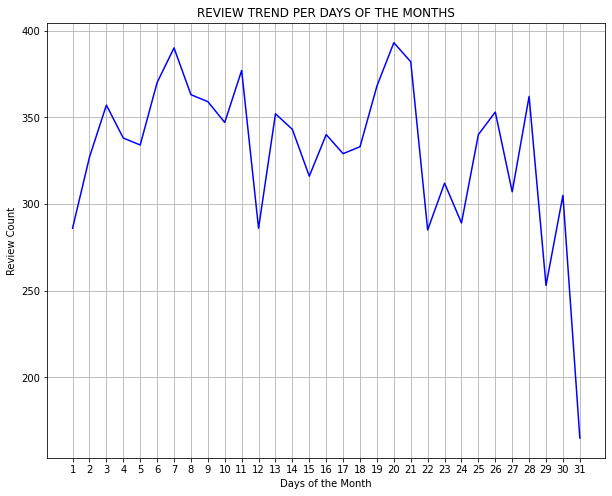

In [ ]:
# Trend by day of the month
day = data
day = day.sort_values(by=['day'],ascending=True)
day =  day.groupby(by=['day']).sum()
day = day.drop(columns=['overall', 'unixReviewTime','year','month'])
day.columns = ['trend']

# Line plot
plt.figure(figsize=(10,8))
sns.lineplot(data=day, x=day.index, y='trend',color='blue')
plt.xticks(day.index)
plt.grid()
plt.ylabel('Review Count')
plt.xlabel('Days of the Month')
plt.title('REVIEW TREND PER DAYS OF THE MONTHS')
plt.show()

### From graph given below we can find about approximately how long reviews are generally

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


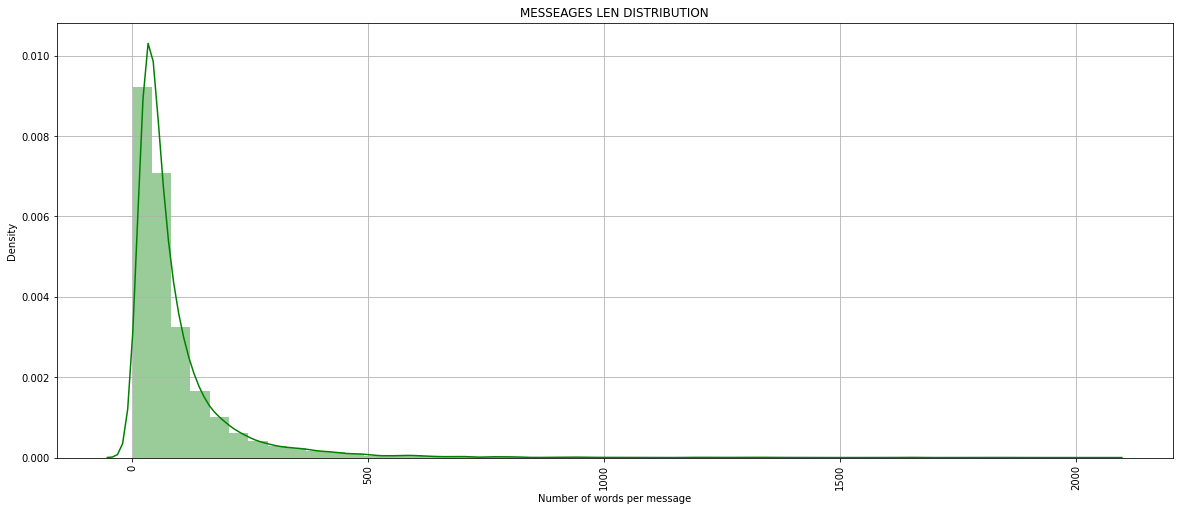

In [ ]:
# Creating a column to see the len of each message
data['Len'] = data['reviewText'].apply(lambda x: len(x.split(' ')))

# Senteces Distribution
unique = data['Len'].unique()
plt.figure(figsize=(20,8))
sns.distplot(data['Len'],color='green')
plt.title('MESSEAGES LEN DISTRIBUTION')
plt.xlabel('Number of words per message')
plt.grid()
plt.xticks(rotation=90)
plt.show()